In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
from loguru import logger
from PIL import Image
from matplotlib import rcParams
from pathlib import Path

from src.analysis.metrics import get_gt_bounds, BoundingBox

Image.MAX_IMAGE_PIXELS = None

In [49]:
font_dirs = [os.path.expanduser("~/.local/share/fonts")]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"]
rcParams["font.size"] = 8

In [2]:
base_dir = Path("/opt/gpudata/sjne/data_for_istar")
resolutions = ["8", "16", "24", "32"]
dists = ["100", "200", "400", "800"]
dirs = {
    dist: [
        d
        for res in resolutions
        for d in base_dir.iterdir()
        if d.stem.startswith("hex") and d.stem.endswith(f"{dist}_{res}")
    ]
    for dist in dists
}
dirs

{'100': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_32')],
 '200': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_32')],
 '400': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_32')],
 '800': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_24'),
  PosixPath('/opt/gpudata/sj

In [3]:
sample_ids = ["TENX111", "TENX114", "TENX147", "TENX148", "TENX149"]

x = {dist: {} for dist in dists}
by_res_data = {dist: {} for dist in dists}

for dist in dists:
    for res_dir in dirs[dist]:
        res = res_dir.name.rsplit("_", maxsplit=1)[-1]
        res_x = []
        by_res_data[dist].update({f"{res} mpp": {}})

        for sample_id in sample_ids:
            with open(res_dir / sample_id / "metrics.pickle", "rb") as f:
                metrics = pickle.load(f)

            res_x.extend(metrics["rmse"].tolist())
            by_res_data[dist][f"{res} mpp"].update(
                {sample_id: metrics["rmse"].mean()}
            )

        x[dist].update({res: res_x})

In [39]:
for dist in dists:
    df = pd.DataFrame(by_res_data[dist]).T
    df["mean"] = df.apply(lambda x: x.mean(), axis=1)
    df.index.name = "Resolution"
    print(f"**Interspot Distance: {dist} um**\n")
    print(df.to_markdown())
    print()

**Interspot Distance: 100 um**

| Resolution   |   TENX111 |   TENX114 |   TENX147 |   TENX148 |   TENX149 |      mean |
|:-------------|----------:|----------:|----------:|----------:|----------:|----------:|
| 8 mpp        | 0.0307354 | 0.023908  | 0.032275  | 0.0370566 | 0.0309487 | 0.0309847 |
| 16 mpp       | 0.0427966 | 0.0349575 | 0.0418692 | 0.0514414 | 0.0436738 | 0.0429477 |
| 24 mpp       | 0.0552199 | 0.0428968 | 0.0597067 | 0.0599756 | 0.0518034 | 0.0539205 |
| 32 mpp       | 0.0789285 | 0.0637027 | 0.0800697 | 0.0972562 | 0.0824304 | 0.0804775 |

**Interspot Distance: 200 um**

| Resolution   |   TENX111 |   TENX114 |   TENX147 |   TENX148 |   TENX149 |      mean |
|:-------------|----------:|----------:|----------:|----------:|----------:|----------:|
| 8 mpp        | 0.0308937 | 0.0238977 | 0.0329167 | 0.0372967 | 0.0311122 | 0.0312234 |
| 16 mpp       | 0.0435097 | 0.0351707 | 0.0440055 | 0.0522504 | 0.0443709 | 0.0438614 |
| 24 mpp       | 0.0523501 | 0.0428274 | 0.05

In [40]:
x_by_res = {res: {} for res in resolutions}
by_dist_data = {f"{res} mpp": {} for res in resolutions}

for dist in dists:
    for res in resolutions:
        x_by_res[res].update({dist: x[dist][res]})
        by_dist_data[f"{res} mpp"].update(
            {f"{dist} um": by_res_data[dist][f"{res} mpp"]}
        )


In [41]:
for resolution in resolutions:
    res = f"{resolution} mpp"
    df = pd.DataFrame(by_dist_data[res]).T
    df["mean"] = df.apply(lambda x: x.mean(), axis=1)
    df.index.name = "Interspot Distance"
    print(f"**Resolution: {res}**\n")
    print(df.to_markdown())
    print()

**Resolution: 8 mpp**

| Interspot Distance   |   TENX111 |   TENX114 |   TENX147 |   TENX148 |   TENX149 |      mean |
|:---------------------|----------:|----------:|----------:|----------:|----------:|----------:|
| 100 um               | 0.0307354 | 0.023908  | 0.032275  | 0.0370566 | 0.0309487 | 0.0309847 |
| 200 um               | 0.0308937 | 0.0238977 | 0.0329167 | 0.0372967 | 0.0311122 | 0.0312234 |
| 400 um               | 0.0312117 | 0.0239575 | 0.0334842 | 0.0373105 | 0.031217  | 0.0314362 |
| 800 um               | 0.0318651 | 0.0244428 | 0.0341996 | 0.0367856 | 0.0315821 | 0.031775  |

**Resolution: 16 mpp**

| Interspot Distance   |   TENX111 |   TENX114 |   TENX147 |   TENX148 |   TENX149 |      mean |
|:---------------------|----------:|----------:|----------:|----------:|----------:|----------:|
| 100 um               | 0.0427966 | 0.0349575 | 0.0418692 | 0.0514414 | 0.0436738 | 0.0429477 |
| 200 um               | 0.0435097 | 0.0351707 | 0.0440055 | 0.0522504 | 0.0443

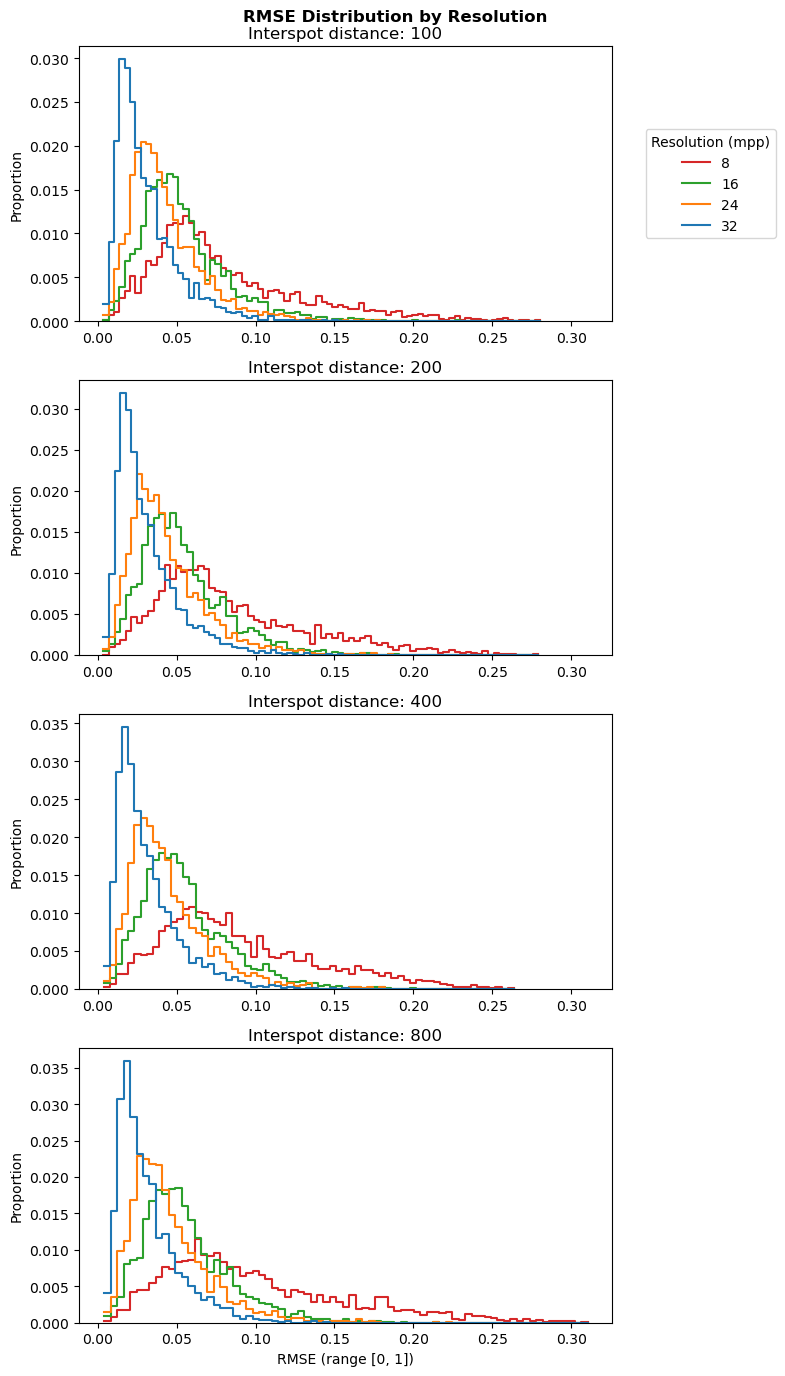

In [ ]:
from seaborn import histplot

fig, axs = plt.subplots(len(dists), figsize=(8, 14), sharex=True)

for i, dist in enumerate(dists):
    ax = axs[i]
    histplot(
        x[dist],
        element="step",
        stat="proportion",
        fill=False,
        legend=False,
        ax=ax,
    )
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("RMSE (range [0, 1])")
    ax.set_title(f"Interspot distance: {dist}")

axs[0].legend(
    title="Resolution (mpp)",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    labels=resolutions,
)
fig.suptitle(
    "RMSE Distribution by Resolution", fontsize=12, fontweight="bold", y=0.98
)
fig.tight_layout()
fig.savefig("rmse_by_resolution.png", dpi=200)

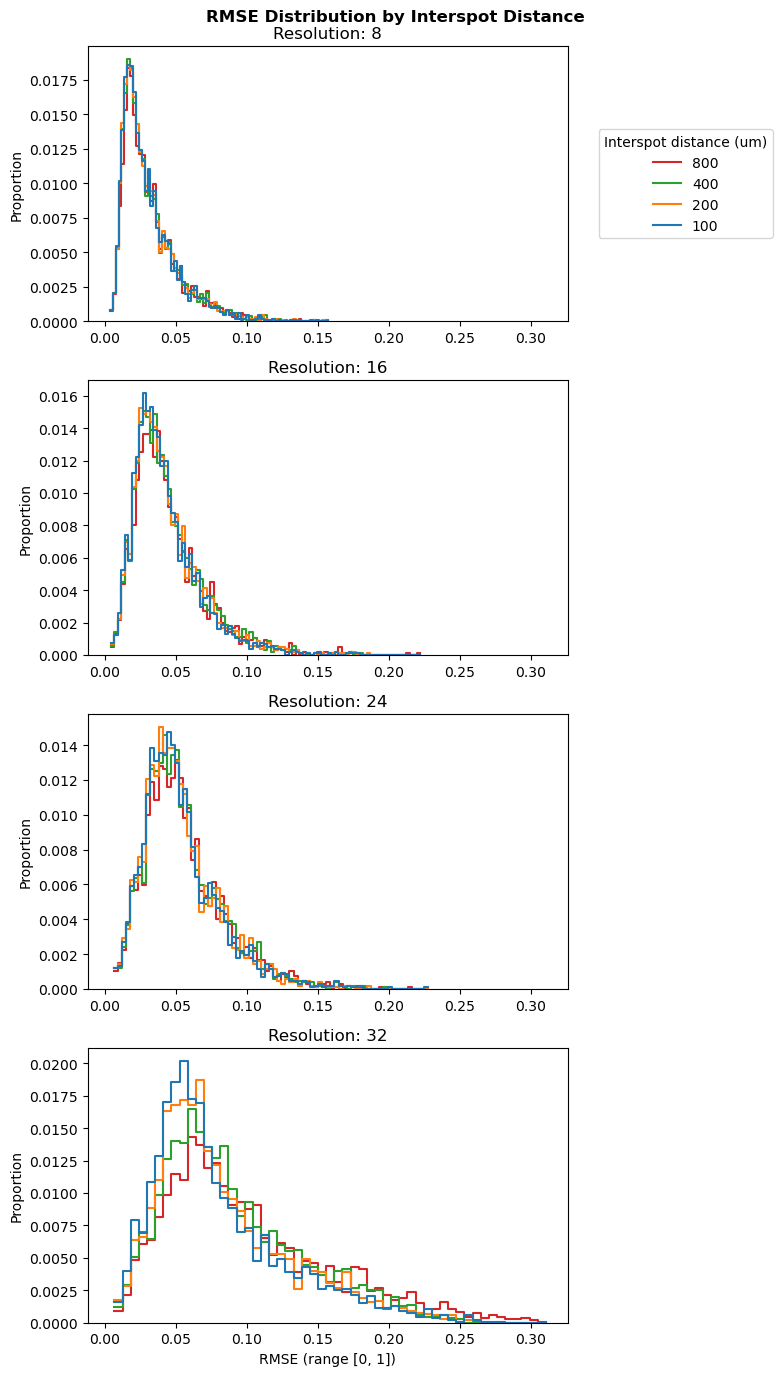

In [ ]:
fig, axs = plt.subplots(len(resolutions), figsize=(8, 14), sharex=True)

for i, res in enumerate(resolutions):
    ax = axs[i]
    histplot(
        x_by_res[res],
        element="step",
        stat="proportion",
        fill=False,
        legend=False,
        ax=ax,
    )
    ax.tick_params(labelbottom=True)
    ax.set_xlabel("RMSE (range [0, 1])")
    ax.set_title(f"Resolution: {res}")

axs[0].legend(
    title="Interspot distance (um)",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    labels=dists[::-1],
)
fig.suptitle(
    "RMSE Distribution by Interspot Distance",
    fontsize=12,
    fontweight="bold",
    y=0.98,
)
fig.tight_layout()
fig.savefig("rmse_by_dist.png", dpi=200)

In [4]:
base_dir = Path("/opt/gpudata/sjne/data_for_istar")
resolutions = ["8", "16", "24", "32"]
dists = ["100", "200", "400", "800"]
dirs = {
    res: [
        d
        for dist in dists
        for d in base_dir.iterdir()
        if d.stem.startswith("hex") and d.stem.endswith(f"{dist}_{res}")
    ]
    for res in resolutions
}
dirs

{'8': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_8'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_8')],
 '16': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_16'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_16')],
 '24': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_24'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_800_24')],
 '32': [PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_100_32'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_200_32'),
  PosixPath('/opt/gpudata/sjne/data_for_istar/hex_55_400_32'),
  PosixPath('/opt/gpudata/sjne/da

In [5]:
sample_ids = ["TENX111", "TENX114", "TENX147", "TENX148", "TENX149"]

x = dists
ssim = {res: [] for res in resolutions}
rmse = {res: [] for res in resolutions}

for res in resolutions:
    for dist_dir in dirs[res]:
        dist_ssim = []
        dist_rmse = []

        for sample_id in sample_ids:
            with open(dist_dir / sample_id / "metrics.pickle", "rb") as f:
                metrics = pickle.load(f)

            dist_ssim.append(np.nanmean(metrics["ssim"]))
            dist_rmse.append(np.nanmean(metrics["rmse"]))

        ssim[res].append(np.mean(dist_ssim))
        rmse[res].append(np.mean(dist_rmse))


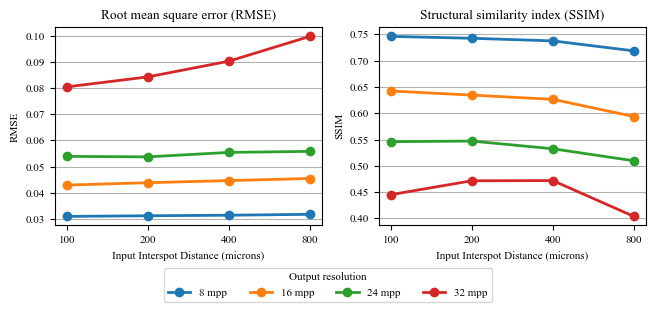

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(6.6, 5 / 12 * 6.6))
for res in resolutions:
    y_rmse = rmse[res]
    y_ssim = ssim[res]

    axs[0].plot(x, y_rmse, label=f"{res} mpp", linewidth=2, marker="o")
    axs[1].plot(x, y_ssim, label=f"{res} mpp", linewidth=2, marker="o")
    axs[0].grid(color="gray", linestyle="-", axis="y", alpha=0.6)
    axs[1].grid(color="gray", linestyle="-", axis="y", alpha=0.6)

axs[0].set_title("Root mean square error (RMSE)")
axs[1].set_title("Structural similarity index (SSIM)")
axs[0].set_ylabel("RMSE")
axs[1].set_ylabel("SSIM")
axs[0].set_xlabel("Input Interspot Distance (microns)")
axs[1].set_xlabel("Input Interspot Distance (microns)")
fig.legend(
    [f"{res} mpp" for res in resolutions],
    bbox_to_anchor=(0.5, 0.04),
    loc="upper center",
    title="Output resolution",
    ncol=4,
)
plt.tight_layout()
plt.savefig("lineplot.png", dpi=300, bbox_inches="tight")

In [31]:
# from src.binning.tissue_positions_hex import visualize

Image.MAX_IMAGE_PIXELS = None

with Image.open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_800_8/TENX111/mask-small.png"
) as img:
    shape = (img.height, img.width)
    print(shape[0] / shape[1])

with Image.open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_800_8/TENX111/he.jpg"
) as img:
    shape = (img.height, img.width)
    print(shape[0] / shape[1])

1.603448275862069
1.603448275862069


In [7]:
from matplotlib.patches import Circle


def visualize(
    tissue_positions: pd.DataFrame,
    img_path: str,
    radius: float,
    out_width: int,
    img_crop: BoundingBox,
    roi: BoundingBox,
    ax: plt.Axes,
) -> None:
    img = Image.open(img_path)
    img_array = np.array(img)

    h, w = img_array.shape[:-1]
    aspect_ratio = w / h
    scale_ratio = out_width / w
    out_height = out_width / aspect_ratio

    # rescale image
    img.thumbnail((out_width, out_height))
    img_thumbnail = np.array(img)
    img_thumbnail = img_thumbnail[
        img_crop.min_r : img_crop.max_r + 1,
        img_crop.min_c : img_crop.max_c + 1,
    ]

    # modify radius
    rescaled_radius = radius * scale_ratio

    # rescale_coords
    tissue_positions["pxl_row_rescaled"] = (
        (tissue_positions["pxl_row_in_fullres"] * scale_ratio)
        .round(0)
        .astype(int)
    ) - img_crop.min_c
    tissue_positions["pxl_col_rescaled"] = (
        (tissue_positions["pxl_col_in_fullres"] * scale_ratio)
        .round(0)
        .astype(int)
    ) - img_crop.min_r

    # crop the thumbnail image at original resolution
    miny, maxy, minx, maxx = roi.min_r, roi.max_r, roi.min_c, roi.max_c
    img_crop = img_thumbnail[miny : maxy + 1, minx : maxx + 1]

    # display cropped image at original resolution
    ax.imshow(img_crop)

    coords = tissue_positions[
        ["pxl_col_rescaled", "pxl_row_rescaled", "in_tissue"]
    ].to_numpy()

    # Filter and draw circles at higher resolution
    for x, y, it in coords:
        if (minx <= x < maxx) and (miny <= y < maxy):
            # Adjust coordinates relative to crop
            x_crop = x - minx
            y_crop = y - miny

            c = Circle(
                (x_crop, y_crop),
                facecolor="none",  # Outline only
                edgecolor="blue",
                linewidth=1,  # Scale linewidth for visibility
                radius=rescaled_radius,
            )
            ax.add_patch(c)

    # Remove axes and set limits to cropped image size
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, img_crop.shape[1])
    ax.set_ylim(img_crop.shape[0], 0)

In [8]:
def load_data_and_visualize(
    data_dir: Path, ax: plt.Axes, bbox: tuple[int, int, int, int]
):
    res = data_dir.parent.name.rsplit("_", maxsplit=1)[-1]
    sample_id = data_dir.name
    gt_dir = data_dir.parent.parent / f"sq_{res}" / sample_id
    gt_extent = get_gt_bounds(gt_dir / "cnts.tsv")

    # load tissue positions and radius data
    tp = pd.read_csv(data_dir / "tissue_positions.csv")
    with open(data_dir / "radius.txt", "r") as f:
        radius = float(f.read())

    with open(data_dir / "radius-raw.txt", "r") as f:
        radius_raw = float(f.read())

    # rescale coords
    scale_ratio = radius / radius_raw

    tp["pxl_row_in_fullres"] = (
        (tp["pxl_row_in_fullres"] * scale_ratio).round(0).astype(int)
    )
    tp["pxl_col_in_fullres"] = (
        (tp["pxl_col_in_fullres"] * scale_ratio).round(0).astype(int)
    )

    # load mask to get output width
    with Image.open(data_dir / "mask-small.png") as f:
        w = f.width

    img_path = data_dir / "he.jpg"
    bbox = BoundingBox(
        min_r=bbox[0], max_r=bbox[1], min_c=bbox[2], max_c=bbox[3]
    )

    visualize(
        tissue_positions=tp,
        img_path=img_path,
        radius=radius,
        out_width=w,
        img_crop=gt_extent,
        roi=bbox,
        ax=ax,
    )

In [9]:
def plot_heatmap(img_path, bbox_unscaled: np.ndarray, res: int, ax: plt.Axes):
    miny, maxy, minx, maxx = (bbox_unscaled / (int(res) / 8)).astype(int)
    img = np.array(Image.open(img_path))
    img = img[miny:maxy, minx:maxx]
    ax.imshow(img)

In [10]:
def set_axis_styling(ax: plt.Axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_color("white")
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_color("white")
    ax.spines["right"].set_linewidth(2)
    ax.spines["bottom"].set_color("white")
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["left"].set_color("white")
    ax.spines["left"].set_linewidth(2)

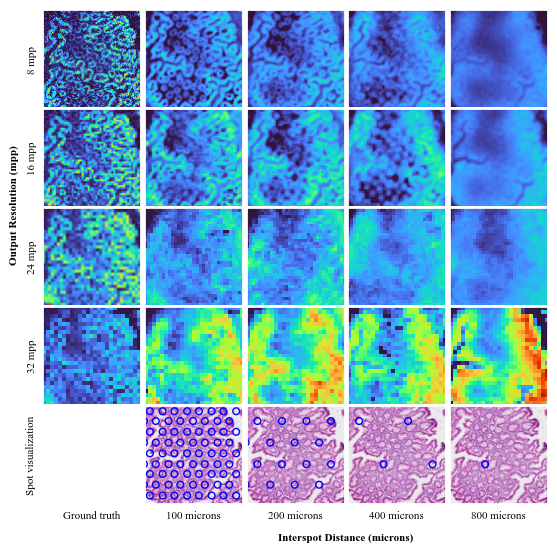

In [51]:
data_dir = Path("/opt/gpudata/sjne/data_for_istar")
sample_id = "TENX114"
imgs_dir = data_dir / "TENX114_CEACAM1_plots"

fig, axs = plt.subplots(5, 5, figsize=(6.6, 6.6))

coords = np.array([550, 650, 160, 260])

for i in range(5):
    for j in range(5):
        ax = axs[i][j]
        set_axis_styling(ax)

        if i == len(axs) - 1 and j == 0:
            # bottom left plot - blank
            # set the x and y labels for first col / last row
            ax.set_ylabel(f"Spot visualization")
            ax.set_xlabel("Ground truth")

        elif i == len(axs) - 1 and j > 0:
            # bottom row - plot spot visualization
            res = 8
            dist = dists[j - 1]
            sample_data_dir = data_dir / f"hex_55_{dist}_{res}" / sample_id
            load_data_and_visualize(
                data_dir=sample_data_dir, ax=ax, bbox=tuple(coords)
            )

            # set x label to show interspot distance
            ax.set_xlabel(f"{dist} microns")

        elif i < len(axs) - 1 and j == 0:
            # left col - plot ground truth
            res = resolutions[i]
            dist = dists[j]
            img_path = imgs_dir / f"hex_55_{dist}_{res}-GT.png"
            plot_heatmap(img_path, coords, res, ax)

            # set y label to show output resolution
            ax.set_ylabel(f"{res} mpp")

        else:
            # remaining plots - plot preds
            res = resolutions[i]
            dist = dists[j - 1]
            img_path = imgs_dir / f"hex_55_{dist}_{res}-INF.png"
            plot_heatmap(img_path, coords, res, ax)


plt.subplots_adjust(wspace=0, hspace=0, left=0.13, bottom=0.13)

# fig.tight_layout(pad=0)
fig.text(
    0.09,
    0.585,
    "Output Resolution (mpp)",
    rotation=90,
    va="center",
    ha="center",
    # fontsize=14,
    fontweight="bold",
)
# Bottom label
fig.text(
    0.592,
    0.08,
    "Interspot Distance (microns)",
    va="center",
    ha="center",
    # fontsize=14,
    fontweight="bold",
)
fig.savefig("heatmap-comparison.png", dpi=300, bbox_inches="tight")

In [119]:
from pathlib import Path

base_dir = Path("/opt/gpudata/sjne/data_for_istar")
dirs = [d for d in base_dir.iterdir() if d.name.startswith("sq")]

for dir in dirs:
    for sample in dir.iterdir():
        print(sample)
        df = pd.read_csv(sample / "cnts.tsv", sep="\t")
        split = df["spot_id"].str.split("x").apply(lambda x: x[::-1])
        df["spot_id"] = split.str.join("x")
        df.set_index("spot_id", inplace=True)
        df.to_csv(sample / "cnts.tsv", sep="\t")

/opt/gpudata/sjne/data_for_istar/sq_8/TENX147
/opt/gpudata/sjne/data_for_istar/sq_8/TENX149
/opt/gpudata/sjne/data_for_istar/sq_8/TENX114
/opt/gpudata/sjne/data_for_istar/sq_8/TENX111
/opt/gpudata/sjne/data_for_istar/sq_8/TENX148
/opt/gpudata/sjne/data_for_istar/sq_16/TENX147
/opt/gpudata/sjne/data_for_istar/sq_16/TENX149
/opt/gpudata/sjne/data_for_istar/sq_16/TENX114
/opt/gpudata/sjne/data_for_istar/sq_16/TENX111
/opt/gpudata/sjne/data_for_istar/sq_16/TENX148
/opt/gpudata/sjne/data_for_istar/sq_24/TENX147
/opt/gpudata/sjne/data_for_istar/sq_24/TENX149
/opt/gpudata/sjne/data_for_istar/sq_24/TENX114
/opt/gpudata/sjne/data_for_istar/sq_24/TENX111
/opt/gpudata/sjne/data_for_istar/sq_24/TENX148
/opt/gpudata/sjne/data_for_istar/sq_32/TENX147
/opt/gpudata/sjne/data_for_istar/sq_32/TENX149
/opt/gpudata/sjne/data_for_istar/sq_32/TENX114
/opt/gpudata/sjne/data_for_istar/sq_32/TENX111
/opt/gpudata/sjne/data_for_istar/sq_32/TENX148


In [82]:
with Image.open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_800_8/TENX111/mask-small.png"
) as img:
    shape = (img.height, img.width)
    mask = np.array(img) > 0

In [102]:
from functools import partial

np.array(
    list(map(partial(str.split, sep="x"), locs.index.to_list())),
    dtype=np.int32,
).max(axis=0)

array([1485,  927], dtype=int32)

In [ ]:
Image.MAX_IMAGE_PIXELS = None
with Image.open(
    "/opt/gpudata/sjne/data_for_istar/sq_8/TENX111/he-raw.png"
) as raw:
    print(raw.height, raw.width)

43090 26909


In [ ]:
927 * 29

26883

In [84]:
locs = pd.read_csv(
    "/opt/gpudata/sjne/data_for_istar/sq_8/TENX111/locs-raw.tsv",
    sep="\t",
    index_col="spot",
)

In [95]:
sample = locs.iloc[:10]
coords = list(map(partial(str.split, sep="x"), sample.index.to_list()))
np.floor_divide(sample, 29)

,x,y
spot,,
9x564,564,9
10x557,557,10
10x560,560,10
10x561,561,10
10x562,562,10
10x564,564,10
10x565,565,10
11x557,557,11
11x559,559,11


In [ ]:
for i, col in enumerate(cnts_df.columns):
    if i == 10:
        break
    print(col)
    print(cnts_df[col].sum())
    cnts = np.zeros(shape)
    for spot_id in cnts_df[col].index:
        spot_col, spot_row = map(lambda x: int(x) - 1, spot_id.split("x"))
        try:
            cnts[spot_row, spot_col] = cnts_df[col][spot_id]
        except IndexError:
            continue
    # cnts[~mask] = np.nan
    # print(np.nansum(cnts))

    x = cnts.copy()
    x -= np.nanmin(x)
    x /= np.nanmax(x) + 1e-12

    cmap = plt.get_cmap("turbo")
    heatmap = cmap(x)[..., :3]
    heatmap[~mask] = 1.0
    heatmap = (heatmap * 255).astype(np.uint8)
    Image.fromarray(heatmap).save(f"{col}.png")

ABCA8
15434.0
ABCC8
2863.0
ACACB
89263.0
ACKR1
14318.0
ACTA2
556850.0
ADAM28
45217.0
ADH1C
7101.0
AGTR1
5262.0
AKR1C3
9011.0
AKR7A3
68508.0


In [15]:
with open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_400_32/TENX111/cnts-super/ABCA8.pickle",
    "rb",
) as f:
    cnts = pickle.load(f)

In [16]:
cnts.min(), cnts.max()

(np.float32(0.068996206), np.float32(29.424145))

In [19]:
with open(
    "/opt/gpudata/sjne/data_for_istar/sq_32/TENX111/cnts-super/ABCA8.pickle",
    "rb",
) as f:
    cnts = pickle.load(f)

In [20]:
np.nanmin(cnts), np.nanmax(cnts)

(np.float64(0.0), np.float64(29.0))

In [ ]:
with open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_400/TENX111/embeddings-gene.pickle",
    "rb",
) as f:
    embs = pickle.load(f)

In [12]:
embs["cls"].shape

(256, 1488, 928)

In [4]:
with open(
    "/opt/gpudata/sjne/data_for_istar/hex_55_100_8/TENX111/embeddings-hist.pickle",
    "rb",
) as f:
    embs = pickle.load(f)

In [5]:
embs["rgb"][0].shape

(1488, 928)

In [14]:
embs["cls"][0].shape

(2080, 2224)

In [53]:
x = pd.read_csv("/opt/gpudata/sjne/HEST/HEST1k-colon.csv")
x[x["st_technology"] == "Xenium"]

,dataset_title,id,image_filename,organ,disease_state,oncotree_code,species,patient,st_technology,data_publication_date,...,treatment_comment,pixel_size_um_embedded,pixel_size_um_estimated,magnification,fullres_px_width,fullres_px_height,tissue,disease_comment,subseries,hest_version_added
5,Characterization of immune cell populations in...,TENX149,TENX149.tif,Bowel,Cancer,COAD,Homo sapiens,Patient 1,Xenium,7/11/2024,...,NaN,0.273777,0.274031,40x,70534.0,60222.0,Colon,Stage II-A,"Xenium In Situ, Sample P1 CRC",v1_1_0
6,Characterization of immune cell populations in...,TENX148,TENX148.tif,Bowel,Cancer,COAD,Homo sapiens,Patient 1,Xenium,7/11/2024,...,NaN,0.273776,0.273760,40x,75184.0,48582.0,Colon,NaN,"Xenium In Situ, Sample P2 CRC",v1_1_0
7,Characterization of immune cell populations in...,TENX147,TENX147.tif,Bowel,Cancer,COAD,Homo sapiens,Patient 1,Xenium,7/11/2024,...,NaN,0.273775,0.249702,40x,71082.0,66226.0,Colon,Stage IV-A,"Xenium In Situ, Sample P5 CRC",v1_1_0
50,Human Colon Preview Data (Xenium Human Colon G...,TENX114,TENX114.tif,Bowel,Healthy,NaN,Homo sapiens,NaN,Xenium,8/29/2023,...,NaN,0.212500,0.136882,40x,53802.0,77802.0,Colon,NaN,"Non-diseased, pre-designed panel",v1_0_0
51,Human Colon Preview Data (Xenium Human Colon G...,TENX111,TENX111.tif,Bowel,Cancer,COAD,Homo sapiens,NaN,Xenium,8/29/2023,...,NaN,0.212500,0.273805,40x,26909.0,43090.0,Colon,cancer; stage 2A adenocarcinoma,"Cancer, pre-designed + add-on panel",v1_0_0


In [25]:
import numpy as np

embs["sub"] = np.array(embs["sub"])
embs["cls"] = np.array(embs["cls"])

In [26]:
for k in embs:
    print(embs[k].shape)

(192, 1488, 928)
(384, 1488, 928)
(3, 1488, 928)


In [114]:
margin, stride = 256, 64
factor = 16
img = np.random.random((23808, 14848, 3))
shape_emb = np.array(img.shape[:2]) // factor
start_list = list(range(0, margin, stride))
for start0 in start_list:
    for start1 in start_list:
        # print(f"shift {start0}/{margin}, {start1}/{margin}")
        stop0, stop1 = -margin + start0, -margin + start1
        print(f"{start0}:{stop0}, {start1}:{stop1}")
        sta0, sta1 = start0 // factor, start1 // factor
        sto0, sto1 = stop0 // factor, stop1 // factor
        print(f"{sta0}:{sto0}, {sta1}:{sto1}")
        print()

0:-256, 0:-256
0:-16, 0:-16

0:-256, 64:-192
0:-16, 4:-12

0:-256, 128:-128
0:-16, 8:-8

0:-256, 192:-64
0:-16, 12:-4

64:-192, 0:-256
4:-12, 0:-16

64:-192, 64:-192
4:-12, 4:-12

64:-192, 128:-128
4:-12, 8:-8

64:-192, 192:-64
4:-12, 12:-4

128:-128, 0:-256
8:-8, 0:-16

128:-128, 64:-192
8:-8, 4:-12

128:-128, 128:-128
8:-8, 8:-8

128:-128, 192:-64
8:-8, 12:-4

192:-64, 0:-256
12:-4, 0:-16

192:-64, 64:-192
12:-4, 4:-12

192:-64, 128:-128
12:-4, 8:-8

192:-64, 192:-64
12:-4, 12:-4



In [ ]:
emb_cls = np.random.randint(low=0, high=100, size=(96, 64, 192))
# for i in range(rand[0].shape[-1]):
#     print(np.array([e[..., i] for e in rand]))
#     print(rand[..., i])
#     chan = repeat(rand[..., i], "h w -> (h r1) (w r2)", r1=16, r2=16)
#     print(chan)
#     break

chans_cls = []
for i in range(emb_cls[0].shape[-1]):  # iterate over 192 channels
    chan = repeat(
        np.array([e[..., i] for e in emb_cls]),  # identical to emb_cls[..., i]
        "h12 w12 -> (h12 h3) (w12 w3)",
        h3=16,
        w3=16,
    )
    chan = chan[:1488, :928]
    chans_cls.append(chan)

In [109]:
list(range(0, 256, 64))

[0, 64, 128, 192]

In [66]:
import matplotlib.pyplot as plt

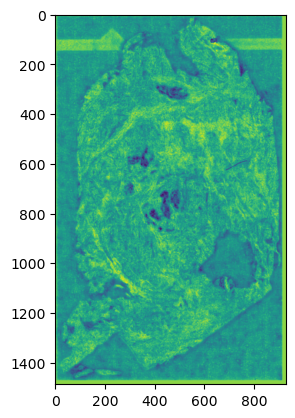

In [123]:
plt.imshow(embs["sub"][100])

In [99]:
print(embs["cls"])
# print(embs["cls"].transpose(1, 2, 0)[16:32, 16:32, 0])

[[[-3.77240866e-01 -3.94371927e-01 -4.11502987e-01 ...  1.38777878e-16
    5.55111512e-17  1.11022302e-16]
  [-3.93307388e-01 -4.11248535e-01 -4.29189652e-01 ... -1.11022302e-16
   -5.55111512e-17  5.55111512e-17]
  [-4.09373939e-01 -4.28125143e-01 -4.46876347e-01 ... -5.55111512e-17
    0.00000000e+00 -1.11022302e-16]
  ...
  [ 1.11633768e-16  1.16248972e-16  1.20072055e-16 ...  1.76608653e-17
    1.42182008e-17  1.01745780e-17]
  [-1.09911190e-18  4.15032868e-18  8.05923642e-18 ...  3.84744434e-17
    3.90136758e-17  3.87844376e-17]
  [ 4.93709565e-17  5.15460941e-17  5.18882060e-17 ... -2.09690265e-18
   -3.16696913e-18 -4.89113054e-18]]

 [[-5.12638986e-01 -5.30728042e-01 -5.48817098e-01 ... -6.66133815e-16
   -6.10622664e-16 -6.10622664e-16]
  [-5.33726931e-01 -5.52455664e-01 -5.71184397e-01 ... -8.32667268e-16
   -8.32667268e-16 -6.93889390e-16]
  [-5.54814875e-01 -5.74183285e-01 -5.93551695e-01 ... -5.55111512e-16
   -4.44089210e-16 -4.16333634e-16]
  ...
  [-7.44411762e-18 -1.0

In [ ]:
from skimage.transform import resize

In [38]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

with Image.open("TENX111/mask-small.png") as img:
    print(img.height, img.width)

with Image.open("TENX111/he.jpg") as img:
    print(img.height, img.width)
    scaled = np.array(img, dtype=np.float32)

1488 928
23808 14848


In [29]:
from einops import rearrange, reduce, repeat

In [ ]:
div_16 = reduce(scaled, "(h h1) (w w1) c -> h1 w1 c", "mean", h=16, w=16)
div_16_reduced = reduce(
    div_16, "(h1 h2) (w1 w2) c -> h1 w1 c", "mean", h2=2, w2=2
)
div_32 = reduce(scaled, "(h h1) (w w1) c -> h1 w1 c", "mean", h=32, w=32)

In [48]:
print(div_16_reduced[0])
print(div_32[0])

[[232.67871 153.80273 206.52148]
 [232.76172 153.88867 206.58887]
 [232.94727 154.31348 206.93945]
 ...
 [233.7334  154.97754 207.86328]
 [233.63477 154.90723 207.85254]
 [233.99902 155.02246 208.07715]]
[[231.62012 153.14258 206.23242]
 [231.71387 153.07031 206.17969]
 [231.80176 153.12988 206.23242]
 ...
 [232.35156 153.73145 207.14551]
 [232.51172 153.77441 207.25488]
 [232.39551 153.73828 207.2539 ]]


In [ ]:
from math import ceil
import numpy as np

h_pad = scaled.height % 256
w_pad = scaled.width % 256
h_new = ceil(scaled.height / 256) * 256
w_new = ceil(scaled.width / 256) * 256
new_img = np.full((h_new, w_new, 3), fill_value=255)

img_as_array = np.array(img)
img.

In [1]:
import pandas as pd

In [4]:
tp = pd.read_csv("TENX111/tissue_positions_sq_934.csv", index_col=0)

In [ ]:
tp.head()

,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,0,0,0,0,0
1,0,0,1,0,934
2,0,0,2,0,1868
3,0,0,3,0,2802
4,0,0,4,0,3736


In [11]:
max_width = 2000
aspect_ratio = img.width / img.height
max_height = max_width / aspect_ratio
sf = max_width / img.width
sf

0.0743245754208629

In [37]:
scaled_s = int(934 * sf)
int(scaled_s)

69

In [30]:
coords = tp[["pxl_col_in_fullres", "pxl_row_in_fullres"]].to_numpy()
scaled_coords = (coords * sf).astype(int)
coords_tuples = list(zip(scaled_coords[:, 0], scaled_coords[:, 1]))

In [31]:
c = set(coords_tuples)

In [32]:
len(c) == len(coords_tuples)

True

In [ ]:
from shapely import Polygon

squares = []
for x, y in coords_tuples:
    bottom_left = (x, y)
    bottom_right = (x + scaled_s, y)
    top_left = (x, y + scaled_s)
    top_right = (x + scaled_s, y + scaled_s)
    squares.append(
        Polygon([bottom_left, bottom_right, top_right, top_left, bottom_left])
    )

In [39]:
import geopandas as gpd

gdf = gpd.GeoSeries(squares)

In [43]:
rolling = 0
for point in gdf:
    rolling += gdf.overlaps(point).sum()
rolling

0

In [ ]:
934 / 256

3.6484375

In [ ]:
import numpy as np

q = np.random.randint(0, 10, (5, 2))
x, y = np.meshgrid(np.arange(0, 10, 2), np.arange(0, 10, 2), indexing="xy")

In [122]:
spots = np.stack((x.flatten(), y.flatten()), axis=1)

In [123]:
q

array([[7, 8],
       [6, 9],
       [6, 1],
       [7, 0],
       [5, 1]])

In [124]:
spots

array([[0, 0],
       [2, 0],
       [4, 0],
       [6, 0],
       [8, 0],
       [0, 2],
       [2, 2],
       [4, 2],
       [6, 2],
       [8, 2],
       [0, 4],
       [2, 4],
       [4, 4],
       [6, 4],
       [8, 4],
       [0, 6],
       [2, 6],
       [4, 6],
       [6, 6],
       [8, 6],
       [0, 8],
       [2, 8],
       [4, 8],
       [6, 8],
       [8, 8]])

In [125]:
distances = np.linalg.norm(q[:, None, :] - spots[None, :, :], axis=-1)

In [ ]:
mask = (q[:, None, :] >= spots[None, :, :]) & (
    q[:, None, :] < (spots[None, :, :] + 2)
)
mask = mask[..., 0] & mask[..., 1]
mask[0].sum()

1

In [ ]:
np.nonzero(mask)

(array([0, 1, 2, 3, 4]), array([23, 23,  3,  3,  2]))

In [130]:
np.argmax(mask, axis=1)

array([23, 23,  3,  3,  2])

In [127]:
spots[mask[0]]

array([[6, 8]])

In [110]:
masked_dist = np.where(mask, distances, np.inf)
np.argmin(masked_dist, axis=-1)

array([61, 66, 83,  7, 26])

In [1]:
import numpy as np

In [2]:
x = np.random.randint(0, 100, (100, 2))

[16,
 2,
 36,
 45,
 52,
 28,
 11,
 17,
 7,
 93,
 62,
 25,
 95,
 22,
 59,
 35,
 90,
 3,
 61,
 3,
 96,
 66,
 60,
 17,
 25,
 94,
 5,
 77,
 47,
 64,
 83,
 80,
 43,
 63,
 88,
 48,
 21,
 85,
 2,
 59,
 67,
 75,
 46,
 93,
 93,
 64,
 45,
 0,
 19,
 67,
 95,
 35,
 69,
 4,
 85,
 84,
 28,
 69,
 44,
 81,
 19,
 16,
 84,
 53,
 88,
 40,
 98,
 15,
 52,
 92,
 95,
 51,
 42,
 97,
 13,
 83,
 71,
 49,
 32,
 91,
 52,
 27,
 61,
 11,
 59,
 73,
 71,
 5,
 57,
 62,
 92,
 28,
 30,
 78,
 39,
 39,
 96,
 44,
 76,
 86,
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',